In [1]:
import yfinance as yp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
dir('yp')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [3]:
tdg = yp.Ticker('tdg')
tdg

yfinance.Ticker object <TDG>

In [4]:
data = tdg.history()
data.head

<bound method NDFrame.head of                                  Open        High         Low       Close  \
Date                                                                        
2023-09-11 00:00:00-04:00  876.989990  881.200012  861.599976  877.820007   
2023-09-12 00:00:00-04:00  873.940002  881.020020  871.280029  872.059998   
2023-09-13 00:00:00-04:00  871.429993  877.840027  860.409973  867.150024   
2023-09-14 00:00:00-04:00  870.000000  877.760010  865.250000  874.119995   
2023-09-15 00:00:00-04:00  871.000000  876.059998  863.039978  864.700012   
2023-09-18 00:00:00-04:00  865.710022  877.510010  865.599976  870.090027   
2023-09-19 00:00:00-04:00  869.010010  875.000000  861.609985  870.590027   
2023-09-20 00:00:00-04:00  875.880005  880.479980  854.330017  854.349976   
2023-09-21 00:00:00-04:00  850.700012  853.770020  840.000000  842.830017   
2023-09-22 00:00:00-04:00  845.570007  853.500000  842.840027  847.359985   
2023-09-25 00:00:00-04:00  842.619995  854.690

In [5]:
data = yp.download(['CROX'], start = '2013-1-1', end = '2023-1-1', group_by = 'ticker')


[*********************100%%**********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,14.69,14.95,14.59,14.80,14.80,3523000
2013-01-03,14.65,15.36,14.61,15.08,15.08,2391000
2013-01-04,15.22,15.50,15.10,15.35,15.35,2250900
2013-01-07,15.25,15.70,15.00,15.36,15.36,2238000
2013-01-08,15.36,15.54,15.05,15.23,15.23,1490400


In [7]:
data['Previous Close'] = data['Close'].shift(1)
data['simple return'] = 100*(data['Close'] - data['Previous Close']) / data['Previous Close']
data = data.dropna()

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close,simple return
Date,,,,,,,,
2013-01-03,14.65,15.36,14.61,15.08,15.08,2391000,14.80,1.891890
2013-01-04,15.22,15.50,15.10,15.35,15.35,2250900,15.08,1.790454
2013-01-07,15.25,15.70,15.00,15.36,15.36,2238000,15.35,0.065142
2013-01-08,15.36,15.54,15.05,15.23,15.23,1490400,15.36,-0.846355
2013-01-09,15.24,15.44,15.13,15.25,15.25,1743000,15.23,0.131323


In [9]:
data['log return'] = 100 * np.log(data['Close'] / data['Previous Close'])
data = data.dropna()
data.head()

C:\Users\chira\AppData\Local\Temp\ipykernel_14748\2434995135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log return'] = 100 * np.log(data['Close'] / data['Previous Close'])


,Open,High,Low,Close,Adj Close,Volume,Previous Close,simple return,log return
Date,,,,,,,,,
2013-01-03,14.65,15.36,14.61,15.08,15.08,2391000,14.80,1.891890,1.874216
2013-01-04,15.22,15.50,15.10,15.35,15.35,2250900,15.08,1.790454,1.774614
2013-01-07,15.25,15.70,15.00,15.36,15.36,2238000,15.35,0.065142,0.065121
2013-01-08,15.36,15.54,15.05,15.23,15.23,1490400,15.36,-0.846355,-0.849957
2013-01-09,15.24,15.44,15.13,15.25,15.25,1743000,15.23,0.131323,0.131237


In [10]:
data['simple_sum'] = data['simple return'].cumsum()
data['log_sum'] = data['log return'].cumsum()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close,simple return,log return,simple_sum,log_sum
Date,,,,,,,,,,,
2013-01-03,14.65,15.36,14.61,15.08,15.08,2391000,14.80,1.891890,1.874216,1.891890,1.874216
2013-01-04,15.22,15.50,15.10,15.35,15.35,2250900,15.08,1.790454,1.774614,3.682344,3.648831
2013-01-07,15.25,15.70,15.00,15.36,15.36,2238000,15.35,0.065142,0.065121,3.747486,3.713951
2013-01-08,15.36,15.54,15.05,15.23,15.23,1490400,15.36,-0.846355,-0.849957,2.901131,2.863994
2013-01-09,15.24,15.44,15.13,15.25,15.25,1743000,15.23,0.131323,0.131237,3.032454,2.995231


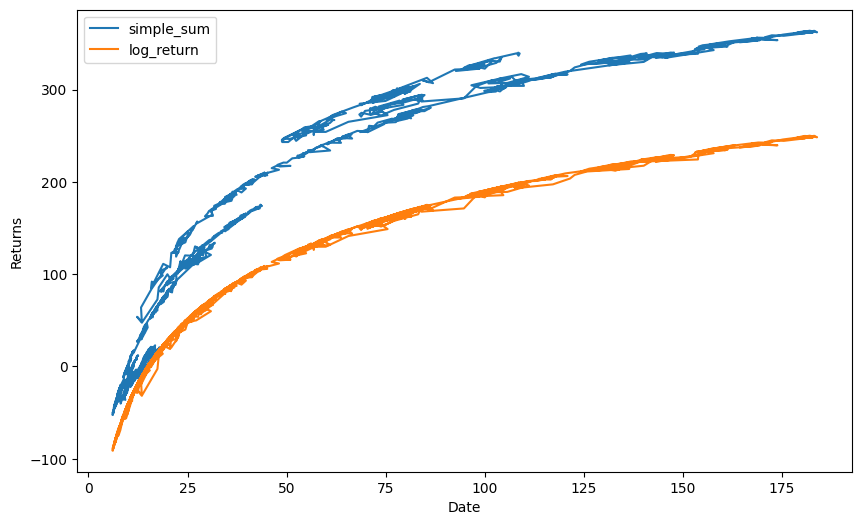

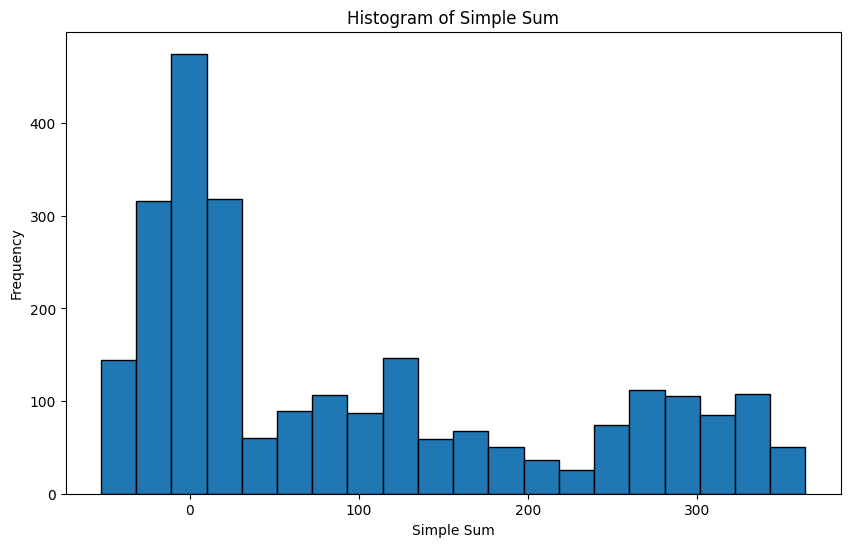

In [11]:

# Assuming you have a DataFrame called 'data'
x = data['High']
y1 = data['simple_sum']
y2 = data['log_sum']

# Plot the line chart as before
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x, y1, label='simple_sum')
plt.plot(x, y2, label='log_return')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Create a histogram for 'simple_sum'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.hist(y1, bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Simple Sum')
plt.ylabel('Frequency')
plt.title('Histogram of Simple Sum')

# Show both plots
plt.show()


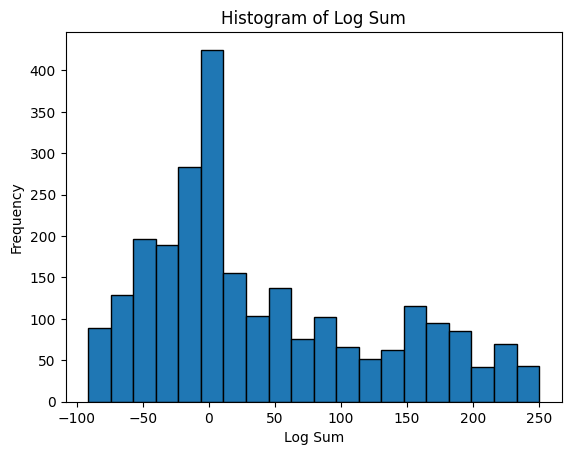

In [12]:


# Assuming you have a DataFrame called 'data'
simple_sum = data['log_sum']

# Create a histogram
plt.hist(simple_sum, bins=20, edgecolor='k')  # Adjust the number of bins as needed

# Add labels and a title
plt.xlabel('Log Sum')
plt.ylabel('Frequency')
plt.title('Histogram of Log Sum')

# Show the plot
plt.show()


In [13]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a column named 'data_points'
data_points = data['simple_sum']

# Calculate the mean
mean = data_points.mean()

# Calculate the median
median = data_points.median()

# Calculate the mode
mode = data_points.mode().iloc[0]
std_dev = np.std(data_points)
# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)

pear_simp = 3*(mean - median)/std_dev
pear_simp

Mean: 94.83931762820654
Median: 32.39055697799109
Mode: -41.62351314343163
Standard Deviation: 123.49938558766549


1.516981489901093

In [14]:
data_points = data['log_sum']
mean = data_points.mean()
median = data_points.median()
mode = data_points.mode().iloc[0]
std_dev = np.std(data_points)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)
pear_log = 3*(mean - median)/std_dev
pear_log

Mean: 40.42069612542358
Median: 6.980333366961011
Mode: -79.85077320163563
Standard Deviation: 86.36263656005941


1.161626048848348

In [15]:
import numpy as np
from scipy.stats import kurtosis
data_points = np.array(data_points)
data_kurtosis = kurtosis(data_points)
print("Kurtosis:", data_kurtosis)


Kurtosis: -0.5457635074513112


In [16]:
data.tail(100)
column_to_sort_by = 'simple return'
sorted_df = (data.tail(100)).sort_values(by=column_to_sort_by, ascending=False)
sorted_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Previous Close,simple return,log return,simple_sum,log_sum
Date,,,,,,,,,,,
2022-12-15,94.150002,94.639999,92.230003,92.410004,92.410004,1201800,96.760002,-4.495658,-4.599847,323.393253,183.160804
2022-08-26,80.730003,81.250000,76.830002,77.110001,77.110001,1470000,81.010002,-4.814222,-4.933965,297.843199,165.060579
2022-10-20,77.440002,79.970001,73.260002,73.300003,73.300003,1933300,77.099998,-4.928658,-5.054261,295.416532,159.993346
2022-08-19,75.430000,76.010002,71.900002,72.849998,72.849998,1796600,76.919998,-5.291211,-5.436339,291.796649,159.377532
2022-12-05,102.879997,102.940002,97.019997,98.089996,98.089996,1964300,103.989998,-5.673624,-5.840933,329.095165,189.125819
2022-11-07,86.690002,86.970001,77.559998,80.400002,80.400002,3196000,85.379997,-5.832743,-6.009765,307.066440,169.238700
2022-11-02,71.000000,71.489998,66.599998,67.050003,67.050003,2897100,71.680000,-6.459260,-6.677312,287.193948,151.081146
2022-09-22,74.489998,74.980003,68.739998,68.779999,68.779999,1646000,74.779999,-8.023536,-8.363747,287.831638,153.628579
2022-11-21,99.820000,100.029999,91.290001,92.570000,92.570000,2755000,101.419998,-8.726088,-9.130518,322.803026,183.333792


In [17]:
historical_returns_df = data[['log return']].sum(axis=1)
print(historical_returns_df)

Date
2013-01-03    1.874216
2013-01-04    1.774614
2013-01-07    0.065121
2013-01-08   -0.849957
2013-01-09    0.131237
                ...   
2022-12-23    0.535414
2022-12-27    4.712443
2022-12-28   -2.627535
2022-12-29    2.367868
2022-12-30    0.684805
Length: 2517, dtype: float64


In [18]:
days = 100
range_returns = historical_returns_df.rolling(window = days).sum()
range_returns = range_returns.dropna()
range_returns

Date
2013-05-28    15.607926
2013-05-29    14.424962
2013-05-30    15.144811
2013-05-31    13.840231
2013-06-03    13.492574
                ...    
2022-12-23    28.600067
2022-12-27    44.658814
2022-12-28    35.679718
2022-12-29    37.330156
2022-12-30    42.384754
Length: 2418, dtype: float64

In [19]:
confidence_interval = 0.95
VaR = -np.percentile(range_returns, 100 - (confidence_interval*100))/100
VaR

0.5291701138506077

In [20]:
confidence_interval = 0.99
VaR = -np.percentile(range_returns, 100 - (confidence_interval*100))/100
VaR

0.8817952148288688

In [21]:
confidence_interval = 0.90
VaR = -np.percentile(range_returns, 100 - (confidence_interval*100))/100
VaR

0.3856922341694711